In [1]:
#set random seeds
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(1)

import pandas as pd
import numpy as np

#machine learning
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers 
from tensorflow import keras
from sklearn.model_selection import train_test_split

#accessing files
from google.cloud import storage
import os

#display charts/images
import matplotlib.pyplot as plt

#don't need
from tensorflow.python.keras.preprocessing import sequence
# from tensorflow.python.keras.preprocessing import text
import tensorflow_hub as hub

import json




2.3.0


In [2]:
params = {
    'image_size': [299, 299],
    'text_input': (58,),
    'batch_size': 512,
    'vocab_size': 30000,
    'examples_per_file': 850, #will not change
    'train_size':8500,
    'test_examples_per_file': 500,
    'test_size': 1000,
    'version': 12, #model version number
    'caption_text_input_length': 49,
    'caption_model_version': 4,
    'meme_text_length': 58,
    'caption_embedding_dim': 300,
    'caption_vocab_size' : 10000,
    'tokenizer_start_index': 58, #index of tokenizer to signal sequence start
    'tokenizer_end_index': 57,

}




In [3]:
try:
    from google.colab import auth
    auth.authenticate_user()
    credentials=None

except ModuleNotFoundError:


    from google.oauth2 import service_account

    credentials = service_account.Credentials.from_service_account_file( #file location of GCS private key
        '/Users/jeremiahherberg/Downloads/hateful-memes-af65c70c1b79.json')

client = storage.Client(project='hateful-memes', credentials=credentials)

In [4]:
bucket = 'jh_hateful_memes'
client = storage.Client(project='hateful-memes', credentials=credentials)


In [5]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.81.17.242:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.81.17.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.81.17.242:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [6]:
def decode_example_train(example):
    '''
    decodes single tfexample from TFrecord file
    '''
    features = {'label': tf.io.FixedLenFeature([], tf.int64),
                'text': tf.io.FixedLenFeature([], tf.string),
                'text_lemma': tf.io.FixedLenFeature([], tf.string),
                'text_lemma_no_stopwords': tf.io.FixedLenFeature([], tf.string),
                'text_no_stopwords':tf.io.FixedLenFeature([], tf.string),
                'image': tf.io.FixedLenFeature([], tf.string)}
    single_example = tf.io.parse_single_example(example, features)
    
    text = tf.io.parse_tensor(single_example['text'], out_type=tf.int32)
    textL = tf.io.parse_tensor(single_example['text_lemma'], out_type=tf.int32)
    # text = tf.cast(text, tf.float32) 
    image = tf.io.decode_jpeg(single_example['image'], 3)
    image = tf.image.resize_with_pad(image, *params['image_size'])
    image = image / 127.5
    image = image -1
    label = single_example['label']
    # label = tf.cast(label, tf.float32)
    return text, image, label

def decode_example_test(example):
    '''
    decodes single tfexample from TFrecord file
    '''
    features = {'id': tf.io.FixedLenFeature([], tf.int64),
                'text': tf.io.FixedLenFeature([], tf.string),
                'text_lemma': tf.io.FixedLenFeature([], tf.string),
                'text_lemma_no_stopwords': tf.io.FixedLenFeature([], tf.string),
                'text_no_stopwords':tf.io.FixedLenFeature([], tf.string),
                'image': tf.io.FixedLenFeature([], tf.string)}
    single_example = tf.io.parse_single_example(example, features)
    
    text = tf.io.parse_tensor(single_example['text'], out_type=tf.int32)
    textL = tf.io.parse_tensor(single_example['text_lemma'], out_type=tf.int32)
    # text = tf.cast(text, tf.float32) 
    image = tf.io.decode_jpeg(single_example['image'], 3)
    image = tf.image.resize_with_pad(image, *params['image_size'])
    image = image / 127.5
    image = image -1
    label = single_example['id']
    # label = tf.cast(label, tf.float32)
    return text, image, label

def flip_image(text, image, label): 
    '''
    randombly flips image input
    
    args:
        text: text output in ds
        image: image output in ds
        label: label output in ds (can also be id)
    returns:
        text, image, label
        args will be otherwise unchanged
    '''
    
    image = tf.image.random_flip_left_right(image)

    return text, image, label


def convert_xy(text, image, label): #needs to be called last
    '''
    transforms ds output from text, image, label -> (text, image), label
    
    args:
        text: text output in ds
        image: image output in ds
        label: label output in ds (can also be id)
    returns:
        (text, image), label
        args will be otherwise unchanged
    '''
    return (text, image), label
    
    

In [7]:
def create_ds(params, client, bucket, prefix, is_training):
    '''
    creates dataset from CSV file 
    args:
        params, dictionary with the following key:
            caption_model_version: int, image caption version number
            train_size: int, dataset size of training data
            test_size: int, dataset size of test data
        client: google.cloud.storage.Client object,
        bucket: bucket CSV files are located in
        prefix: str, prefix to append to the beginng of each file name
        is_training: Bool, indicator if the DS is for training/validation or testing
    '''
    caption_version = params['caption_model_version']
    text_file = '{}_caption_model_text_v{}.csv'.format(prefix, caption_version)
    caption_file = '{}_caption_model_captions_v{}.csv'.format(prefix, caption_version)
    label_file = '{}_caption_model_label_v{}.csv'.format(prefix, caption_version)
    for file in [text_file, caption_file, label_file]:
        if not os.path.isfile(file):
            download_file(client, bucket, file)
    text = pd.read_csv(text_file)
    caption = pd.read_csv(caption_file)
    labels = pd.read_csv(label_file)
    ds = tf.data.Dataset.from_tensor_slices(((caption.values, text.values), labels.values))
    if is_training:
        batch_size = params['train_size']
    else:
        batch_size = params['test_size']
    ds = ds.batch(batch_size)
    return ds

    

In [8]:
def download_file(client, bucket, file_name):
    '''
    downloads a file from a GCS bucket into working directory

    args:
        client: google.cloud.storage.Client object
        bucket: str, name of bucket to download file from
        file_name: str, file name to download
    returns: None
    
    '''
    _bucket = client.bucket(bucket)
    blob = _bucket.blob(file_name)
    blob.download_to_filename(file_name)

In [9]:
def get_object_detection_model(params):
    '''
    downloads pretained object detection model from tf zoo 
    and creates model instance
    
    args:
        params: dict with the following keys:
            object_detection_url: str, url of model in model zoo:
    (https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)
    
    returns:
        pretrained object detection model
    '''
    url = params['object_detection_url']
    model_name = url.split('.tar.')[0].split('/')[-1]
    local_model_location = tf.keras.utils.get_file(fname=model_name,
                                                  origin=url,
                                                  untar=True)
    model_path = os.path.join(local_model_location, 'saved_model')
    model = hub.load(model_path)
    model = model.signatures['serving_default']
    return model

def decode_single_object_detection(predictions, idx, threshold, max_objects):
    '''
    decodes a single prediction of all object classes in the prediction
    
    args:
        predictions: dictionary, prediction dictionary
            must have following keys:
            detection_classes: tensor of detection classes
            detection_scores: tensor of confidence of each detected object
        idx: int, the index of the predictions dictionary that is being decoded
        threshold: float, between 0 - 1, minimum confidence of detected objects
            to be included in list of objects detected
        max_objects: int, maximum number of objects to be included in prediction
            if there are less predicted objects above threshold, returned list will
            be zero padded
            
    returns:
        array of classes of objects being predicted
    '''
    classes = predictions['detection_classes'][idx]
    confidences = predictions['detection_scores'][idx]
    predicted_classes = []
    for indx in range(len(confidences)):
        if confidences[indx] < threshold:
            break
        predicted_classes.append(int(classes[indx].numpy()))
    return sequence.pad_sequences([predicted_classes], maxlen=max_objects)[0].tolist()



def make_object_detectionDS(params, images, model):
    '''
    converts a batch of images to a batch of predicted classes of objects
    
    args:
        params: dictionary with following keys:
            object_det_thres: float, minimum confidence of detected objects
            to be included in list of objects detected, must be between 0 - 1
            object_det_len: int, maximum number of objects to be included in 
            prediction if there are less predicted objects above threshold, 
            returned tensor will be zero padded
        images tensor, batch of images to get predicted classes of objects
            for
        model: pre-trained object detection model
    
    returns: tensor shapped [bs, params['object_det_len']], output of model
        of predicted classes each image contains, zero-padded so that each
        image prediction has a len of params['object_det_len'], and predictions
        under params['object_det_thres'] are filtered out
    '''
    thres = params['object_det_thres']
    maxlen = params['object_det_len']
    model_output = model(images)
    predictions = []
    for idx in range(len(images)):
        single_image_output = decode_single_object_detection(model_output, idx,
                                                            thres, maxlen)
        predictions.append(single_image_output)
    predictions = tf.convert_to_tensor(predictions)
    return predictions

def transform_normalized_uint8(data):
    '''
    transforms a tensor normalized (0 - 1) to dtype uint8
    
    args:
        data: tensor, data to be transformed
        
    returns:
        tensor of data in dtype of unit8 and no longer normalized
    '''
    data *= 255
    data = tf.cast(data, tf.uint8)
    return data
    

In [10]:
def pair_separableConv1D(x, 
                         filters, kernal_size, act, first_reg, sec_reg,
                        maxpooling_poolsize):
    '''
    function to add the following layers to a Keras Functional model:
        layers.SeparableConv1D
        layers.SeparableConv1D
        layers.MaxPooling1D
    
    args:
        x: keras input layer, or series of layers that can be traced to input layer
        kernal_size: int, kernal size for SeparableConv1D layers
        act: str, activation for SeparableConv1D layers
        first_reg, keras regularizer to pass into 1st conv layer
        sec_reg, keras regularizer to pass into 2nd conv layer
        maxpooling_poolsize: int, poolsize for maxpooling layer
    
    returns:
        x: x that was input into fn with above layers added
    '''
    x = layers.SeparableConv1D(filters=filters, kernel_size=kernal_size, 
                              activation=act, padding='same',
                              kernel_regularizer=first_reg)(x)
    x = layers.SeparableConv1D(filters=filters, kernel_size=kernal_size, 
                              activation=act, padding='same',
                              kernel_regularizer=sec_reg)(x)
    x = layers.MaxPooling1D(pool_size=maxpooling_poolsize, padding='same')(x)
    x = layers.BatchNormalization()(x)
    return x

In [11]:
def conv2dset(x, 
              conv_filter, kernel, regularizer=None, 
              maxpooling_poolsize=2, 
              conv_act=None, 
              dense_units=None, dense_act=None):
    '''
    function to add the following layers to a Keras Functional model:
        layers.Conv2D
        MaxPooling2D
        Batchnormalization
        (activation layer)
        layers.Dense (if applicable)
    
    args:
        x: keras input layer, or series of layers that can be traced to input layer
        conv_filter: int, number of filters in Conv2D layer
        kernel: int, kernel size in Conv2D layer
        regularizer: keras.regularizers object, default: None, regularizer in 
            Conv2D layer
        maxpooling_poolsize: int, default 2, poolsize for maxpooling layer
        conv_act: keras layer (without the "()"), default None, activation
            layer that will go after the batchnormalization layer
        dense_units: int, default None, number of units in dense layer
            if None, there will be no dense layer
        dense_act: str, default None, activation in dense layer
    
    returns:
        x: x that was input into fn with above layers added
        
    '''
    x = layers.Conv2D(filters=conv_filter, kernel_size=kernel, padding='same', 
                      kernel_regularizer=regularizer)(x)
    if maxpooling_poolsize:
        x = layers.MaxPooling2D(maxpooling_poolsize)(x)
    # x = layers.BatchNormalization()(x)
    if conv_act:
        x = conv_act()(x)
    if dense_units:
        x = layers.Dense(dense_units, activation=dense_act)(x)
    
    return x

def convblock(x, conv_fn, filters, regularizer, conv_act, kernal=5):
    '''
    makes a block of convolution layers
    
    todo -- work on documentation 
    '''
    count = 0
    for _ in range(2):
        for filter_ in filters:
            count +=1
            if count == 2:
                x1 = conv_fn(x, filter_, kernal, regularizer, 2, conv_act,)
                x = x1
            else:
                x = conv_fn(x, filter_, kernal, regularizer, None, conv_act)
    x = layers.Add()([x, x1])
    return x



In [12]:
def create_model(params=params,
                dense_nodes=256,
                ltsm_units=128,
                ltsm_dense_units=64):
    '''
    creates model with two inputs and out output

        
    '''
    #set some fixed variables
    text_input_shape = params['text_input']
    vocab_size = params['vocab_size']
    image_size = params['image_size']
    caption_input_len = params['caption_text_input_length']
    meme_text_len = params['meme_text_length']
    caption_dim = params['caption_embedding_dim']
    caption_vocab_size = params['caption_vocab_size']
    

    relu = layers.ReLU
    leaky = layers.LeakyReLU
    reg = keras.regularizers.l2(0.001,)
    dense_act = None
    
    #model inputs
    input_text = layers.Input(text_input_shape, name='text_input')
    embedding = layers.Embedding(input_dim=vocab_size+1, output_dim=300,  #300
                                 input_length=meme_text_len, mask_zero=True)(input_text)
    embedding = layers.Dropout(0.5)(embedding)

    
    input_caption = layers.Input((caption_input_len,), name='caption_input')
    embedding_caption = layers.Embedding(input_dim=caption_vocab_size+1, output_dim=caption_dim, #caption_dim
                                         input_length=caption_input_len, mask_zero=True)(input_caption)
    embedding_caption = layers.Dropout(0.5)(embedding_caption)



    text = layers.Concatenate(axis=1)([embedding_caption, embedding])

    # # bidirectional
    text = layers.Bidirectional(layers.LSTM(ltsm_units, return_sequences=False))(text)
    text = layers.Dense(ltsm_dense_units, activation = 'relu')(text)
    text = layers.Dense(dense_nodes, activation='tanh')(text)
    text = layers.LeakyReLU()(text)

        


    x = text
    

    final_output = layers.Dense(1, activation='sigmoid', name='final_out')(x)
    

    
    model = keras.Model([input_caption, input_text], final_output) #input_image
    metrics = [
          keras.metrics.TruePositives(name='tp'),
    #           keras.metrics.FalsePositives(name='fp'),
    #           keras.metrics.TrueNegatives(name='tn'),
          keras.metrics.FalseNegatives(name='fn'), 
          keras.metrics.BinaryAccuracy(name='accuracy'),
    #           keras.metrics.Precision(name='precision'),
    #           keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc'),
    ]
    schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.0003, 27 *4, 0.65) #10 *3
    model.compile(
    optimizer=tf.keras.optimizers.Adam(schedule),
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.01),
    metrics=metrics)
    
    return model
    
    



In [13]:
data_set = create_ds(params, client, bucket,
                    'training', True)
for data in data_set:
    ds = data
    break

In [14]:
tf.random.set_seed(1)
np.random.seed(1)
with strategy.scope():
    model = create_model()
    model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
caption_input (InputLayer)      [(None, 49)]         0                                            
__________________________________________________________________________________________________
text_input (InputLayer)         [(None, 58)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 49, 300)      3000300     caption_input[0][0]              
__________________________________________________________________________________________________
embedding (Embedding)           (None, 58, 300)      9000300     text_input[0][0]                 
_______________________________________________________________________________________

In [15]:
#calculate class weights
target_0 = 5450 #these values will not change (are from review of test ds)
target_1 = 3050
total = target_0 + target_1

class_weight_0 = (1 / target_0) * (total) / 2.0
class_weight_1 = (1 / target_1) * (total) / 2.0

class_weights = {0: class_weight_0, 1: class_weight_1}

#early stopping if validation auc stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                patience=5,
                                mode='max',
                                restore_best_weights=True)

history = model.fit(x=(ds[0]), y=ds[1], 
                    validation_split=0.2, 
                    epochs=250, 
                    class_weight=class_weights, 
                    callbacks=[early_stopping],
                    steps_per_epoch=27)

Epoch 1/250
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


 2/27 [=>............................] - ETA: 0s - loss: 0.7043 - tp: 172.0000 - fn: 22.0000 - accuracy: 0.3988 - auc: 0.4565WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0024s vs `on_train_batch_end` time: 0.0482s). Check your callbacks.


27/27 [==============================] - ETA: 0s - loss: 0.6916 - tp: 2040.0000 - fn: 375.0000 - accuracy: 0.4099 - auc: 0.5032WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_test_batch_end` time: 0.0225s). Check your callbacks.


27/27 [==============================] - 10s 368ms/step - loss: 0.6916 - tp: 2040.0000 - fn: 375.0000 - accuracy: 0.4099 - auc: 0.5032 - val_loss: 0.6908 - val_tp: 21.0000 - val_fn: 583.0000 - val_accuracy: 0.6482 - val_auc: 0.5604
Epoch 2/250
27/27 [==============================] - 4s 130ms/step - loss: 0.6871 - tp: 1206.0000 - fn: 1209.0000 - accuracy: 0.6404 - auc: 0.6380 - val_loss: 0.6721 - val_tp: 149.0000 - val_fn: 455.0000 - val_accuracy: 0.6635 - val_auc: 0.6311
Epoch 3/250
27/27 [==============================] - 3s 125ms/step - loss: 0.6436 - tp: 1329.0000 - fn: 1086.0000 - accuracy: 0.6725 - auc: 0.6980 - val_loss: 0.6445 - val_tp: 357.0000 - val_fn: 247.0000 - val_accuracy: 0.6418 - val_auc: 0.6706
Epoch 4/250
27/27 [==============================] - 4s 132ms/step - loss: 0.5494 - tp: 1746.0000 - fn: 669.0000 - accuracy: 0.7285 - auc: 0.8034 - val_loss: 0.6232 - val_tp: 354.0000 - val_fn: 250.0000 - val_accuracy: 0.6659 - val_auc: 0.7076
Epoch 5/250
27/27 [===============

In [16]:
def plot_metric(metric1, metric2, ylabel):
    plt.plot(history.history[metric1], label=metric1)
    plt.plot(history.history[metric2], label=metric2)
    plt.ylabel(ylabel)
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

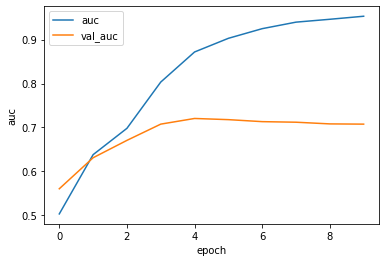

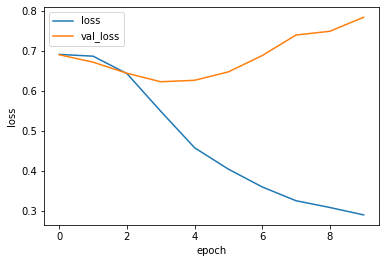

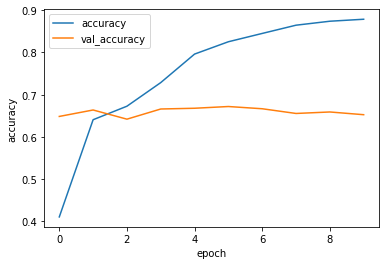

In [17]:
plot_metric('auc', 'val_auc', 'auc')
plot_metric('loss', 'val_loss', 'loss')
plot_metric('accuracy', 'val_accuracy', 'accuracy')

In [18]:
max(history.history['val_auc']) 

0.7204735279083252

In [19]:
model_name = 'model_hateful_memes_v{}.h5'.format(params['version'])
model.save(model_name)
bucket_ = client.bucket('jh_hateful_memes')
blob = bucket_.blob(model_name)
blob.upload_from_filename(model_name)#fix this

In [20]:
test_ds = create_ds(params, client, bucket, 'test_seen', False)

In [21]:
for x_test, ids in test_ds:

    test_text, test_images = x_test
    predictions = model.predict(x_test, steps=10)
    prediction_ids = ids



In [22]:
prediction_dict = {
    'id': np.concatenate(prediction_ids.numpy()),
    'proba': np.concatenate(predictions),
    'label': np.ones(1000, int)
}
submission_ds = pd.DataFrame(prediction_dict)



In [23]:
submission_ds.to_csv('submission.csv', index=False)

In [1]:
import requests

In [2]:
url = 'http://ipinfo.io/json'
response = requests.get(url)
response.text

'{\n  "ip": "35.239.43.67",\n  "hostname": "67.43.239.35.bc.googleusercontent.com",\n  "city": "Council Bluffs",\n  "region": "Iowa",\n  "country": "US",\n  "loc": "41.2619,-95.8608",\n  "org": "AS15169 Google LLC",\n  "postal": "51502",\n  "timezone": "America/Chicago",\n  "readme": "https://ipinfo.io/missingauth"\n}'